In [83]:
import pandas as pd
import numpy as np
import psycopg2 as pg
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [84]:
# Gloabal Constants
pass_file = "/mnt/data/mvesc/pgpass" # username, db information

# Table names
sqlcmd_table_names = "SELECT table_name FROM information_schema.tables WHERE table_schema = 'public'"

Tab_CurrentStudents = "CurrentStudents"
Tab_AllDis1112 = "AllDistricts1112"
Tab_AllDis1213 = "AllDistricts1213"
Tab_AllDis1314 = "AllDistricts1314"
Tab_AllDis1515 = "AllDistricts1415"

# The table names in a string, from Jackie
ALL_DISTRICTS_TABLES = ["AllDistricts" + str(num-1) + str(num) for num in range(15,11, -1)]
ALL_DISTRICTS_TABLES.insert(0, "CurrentStudents")
# ['CurrentStudents', 'AllDistricts1112', 'AllDistricts1213', 'AllDistricts1314', 'AllDistricts1415']

Tab_HSGrades = "HSGrades"

In [85]:
# Set up connection to postgres database
with open(pass_file, 'r') as f:
    passinfo = f.read()
passinfo = passinfo.strip().split(':')

host_address = passinfo[0]
user_name = passinfo[2]
name_of_database = passinfo[3]
user_password = passinfo[4]
connection = pg.connect(host=host_address, database=name_of_database, user=user_name, password=user_password)
cursor = connection.cursor()
table_names = pd.read_sql(sqlcmd_table_names, connection)
print(table_names)

                  table_name
0          DistrictSchoolIDs
1            CurrentMobility
2            CurrentStudents
3              ASQ_Preschool
4                  ActScores
5           AllDistricts1112
6                   HSGrades
7           AllDistricts1213
8                  AIRScores
9           AllDistricts1314
10  CurrentAbsenceDiscipline
11                  DIBELSv2
12          AllDistricts1415
13             AllGradsTotal
14                    OAAOGT
15                     PARCC
16                  StarRead
17                    StarEL
18                  StarMath
19                 TerraNova


In [86]:
# functions explore a table
def get_column_names(table, connection):
    """
    Get column names of a table 
    
    :param pg.extensions.connection object connection: sql connection
    :param string table: table name in the database
    :rtype: list 
    """
    temp_table = pd.read_sql("select * FROM \"%s\" limit 1" % table, connection)
    return list(temp_table.columns)

def read_table_to_df(table_name, connection):
    """ from Jackie
    Takes a table name as input and returns postgres table as pandas data frame.
    
    :param string table_name: Name of table to read in
    :param psycopg2.connection connection: POSTGRESQL connection object for Python
    :return: a Pandas dataframe object containing the desired table
    :rtype: Pandas.dataframe
    """
    sql_query = "SELECT * FROM \"" + table_name + "\";"
    data = pd.read_sql(sql_query, connection)
    return data

def different_columns(table1, table2, connection):
    """ find different columns names of two tables
    
    :param string table1: name of table 1
    :param string table2: name of table 2
    :param pg.connection connection: sql connection
    :return: a list with 2 sets of different columns names in 2 tables
    :rtype: list[set, set]
    """
    columns1 = get_column_names(table1, connection)
    columns2 = get_column_names(table2, connection)
    diff_col1 = set(columns1) - set(columns2)
    diff_col2 = set(columns2) - set(columns1)
    return([diff_col1, diff_col2])

In [87]:
# Read all the data in a list 
# Old district data's first column ReCounter is dropped
all_districts_data = [read_table_to_df(table_name, connection).iloc[:, 1:] for table_name in ALL_DISTRICTS_TABLES[1:]]
all_districts_data.insert(0, read_table_to_df(ALL_DISTRICTS_TABLES[0], connection))

In [100]:
# double check columns to see if they have the same structure
list_all_district_data_cols = [list(df.columns) for df in all_districts_data]
pd.DataFrame(np.transpose(np.array(listcols)), columns=ALL_DISTRICTS_TABLES)

CurrentStudents            AllDistricts1415  \
0                StudentLookup               StudentLookup   
1                CURRENT_GRADE               CURRENT_GRADE   
2                     HANDICAP                    HANDICAP   
3                HANDICAP_DESC               HANDICAP_DESC   
4             DISADVANTAGEMENT            DISADVANTAGEMENT   
5        DISADVANTAGEMENT_DESC       DISADVANTAGEMENT_DESC   
6                DATE_OF_BIRTH               DATE_OF_BIRTH   
7               STUDENT_STATUS              STUDENT_STATUS   
8          STUDENT_STATUS_DESC         STUDENT_STATUS_DESC   
9                       GENDER                      GENDER   
10          RACIAL_ETHNIC_DESC          RACIAL_ETHNIC_DESC   
11             LIMITED_ENGLISH             LIMITED_ENGLISH   
12                      GIFTED                      GIFTED   
13              ADMISSION_DATE              ADMISSION_DATE   
14      PERCENT_ATTEND_2014_15      PERCENT_ATTEND_2013_14   
15  DAYS_IN_ATTENDANCE_2014_15  DAYS_IN_ATTENDANCE_2013_14   
16         DAYS_ABSENT_2014_15         DAYS_ABSENT_2013_14   
17               TARDY_2014_15               TARDY_2013_14   
18      PERCENT_ATTEND_2013_14      PERCENT_ATTEND_2012_13   
19  DAYS_IN_ATTENDANCE_2013_14  DAYS_IN_ATTENDANCE_2012_13   
20         DAYS_ABSENT_2013_14        DAYS_ABSENCT_2012_13   
21               TARDY_2013_14               TARDY_2012_13   
22      DISC_INCIDENTS_2014_15      DISC_INCIDENTS_2013_14   
23      IN_SCHOOL_SUSP_2014_15      IN_SCHOOL_SUSP_2013_14   
24  OUT_OF_SCHOOL_SUSP_2014_15  OUT_OF_SCHOOL_SUSP_2013_14   
25               EXPUL_2014_15               EXPUL_2013_14   
26                    District                    District   
27                      School                      School   

              AllDistricts1314            AllDistricts1213  \
0                StudentLookup               StudentLookup   
1                CURRENT_GRADE               CURRENT_GRADE   
2                     HANDICAP                    HANDICAP   
3                HANDICAP_DESC               HANDICAP_DESC   
4             DISADVANTAGEMENT            DISADVANTAGEMENT   
5        DISADVANTAGEMENT_DESC       DISADVANTAGEMENT_DESC   
6                DATE_OF_BIRTH               DATE_OF_BIRTH   
7               STUDENT_STATUS              STUDENT_STATUS   
8          STUDENT_STATUS_DESC         STUDENT_STATUS_DESC   
9                       GENDER                      GENDER   
10          RACIAL_ETHNIC_DESC          RACIAL_ETHNIC_DESC   
11             LIMITED_ENGLISH             LIMITED_ENGLISH   
12                      GIFTED                      GIFTED   
13              ADMISSION_DATE              ADMISSION_DATE   
14      PERCENT_ATTEND_2012_13      PERCENT_ATTEND_2011_12   
15  DAYS_IN_ATTENDANCE_2012_13  DAYS_IN_ATTENDANCE_2011_12   
16        DAYS_ABSENCE_2012_13         DAYS_ABSENT_2011_12   
17               TARDY_2012_13               TARDY_2011_12   
18      PERCENT_ATTEND_2011_12      PERCENT_ATTEND_2010_11   
19  DAYS_IN_ATTENDANCE_2011_12  DAYS_IN_ATTENDANCE_2010_11   
20        DAYS_ABSENCE_2011_12         DAYS_ABSENT_2010_11   
21               TARDY_2011_12               TARDY_2010_11   
22      DISC_INCIDENTS_2012_13      DISC_INCIDENTS_2011_12   
23      IN_SCHOOL_SUSP_2012_13      IN_SCHOOL_SUSP_2011_12   
24  OUT_OF_SCHOOL_SUSP_2012_13  OUT_OF_SCHOOL_SUSP_2011_12   
25               EXPUL_2012_13               EXPUL_2011_12   
26                    District                    District   
27                      School                      School   

              AllDistricts1112  
0                StudentLookup  
1                CURRENT_GRADE  
2                     HANDICAP  
3                HANDICAP_DESC  
4             DISADVANTAGEMENT  
5        DISADVANTAGEMENT_DESC  
6                DATE_OF_BIRTH  
7               STUDENT_STATUS  
8          STUDENT_STATUS_DESC  
9                       GENDER  
10          RACIAL_ETHNIC_DESC  
11             LIMITE

In [109]:
# Generate column names based on table name
current_columns = list(all_districts_data[0].columns)
columns_name_base = ['StudentLookup', 'CURRENT_GRADE', 'HANDICAP', 'HANDICAP_DESC', 'DISADVANTAGEMENT', 'DISADVANTAGEMENT_DESC', 'DATE_OF_BIRTH', 'STUDENT_STATUS', 'STUDENT_STATUS_DESC', 'GENDER', 'RACIAL_ETHNIC_DESC', 'LIMITED_ENGLISH', 'GIFTED', 'ADMISSION_DATE', 'PERCENT_ATTEND', 'DAYS_IN_ATTENDANCE', 'DAYS_ABSENT', 'TARDY', 'PERCENT_ATTEND', 'DAYS_IN_ATTENDANCE', 'DAYS_ABSENT', 'TARDY', 'DISC_INCIDENTS', 'IN_SCHOOL_SUSP', 'OUT_OF_SCHOOL_SUSP', 'EXPUL', 'District', 'School']
pd.Series(current_columns)
current_year=16 # last 2 characters of a table name
year_append1 = "_20"+str(current_year-2)+"_"+str(current_year-1)
year_append2 = "_20"+str(current_year-3)+"_"+str(current_year-2)
year_append = [year_append1]*4 + [year_append2]*4 + [year_append1]*4


In [114]:
[year_append1]*4 + [year_append2]*4 + [year_append1]*4

['_2014_15',
 '_2014_15',
 '_2014_15',
 '_2014_15',
 '_2013_14',
 '_2013_14',
 '_2013_14',
 '_2013_14',
 '_2014_15',
 '_2014_15',
 '_2014_15',
 '_2014_15']

In [79]:
# get general summary of table 
def Table_Summary(connection, table):
    def get_missing_value(col):
        cmd = "select count(*) from \"%s\" where \"%s\" is null" % (table, col)
        df = pd.read_sql(cmd, connection)
        return df.iloc[0,0]
    def distinct_values(col):
        cmd = "select \"%s\", count(*) from \"%s\" group by \"%s\" order by count(*) desc" % (col, table, col)
        df = pd.read_sql(cmd, connection)
        return df
    
    colnames = Get_Column_Names(connection, table)
    total_rows = pd.read_sql("select count(*) from \"%s\";" % (table), connection).iloc[0,0]
    missing_values = [get_missing_value(col) for col in colnames]
    print distinct_values("CURRENT_GRADE")
Table_Summary(connection, T_CurrentStudents)

   CURRENT_GRADE  count
0             11   2853
1             12   2776
2             10   2663
3             09   2591
4             03   2542
5             08   2524
6             02   2489
7             05   2488
8             07   2446
9             KG   2412
10            01   2400
11            06   2374
12            04   2308
13            PS   1364
14            23     56
15            13     37
16            14      3
17            GR      1

[18 rows x 2 columns]


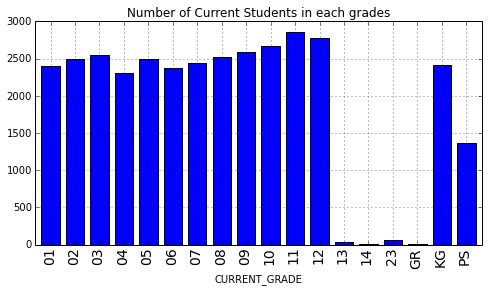

In [101]:
def distinct_values(col, connection, table):
    cmd = "select \"%s\", count(*) from \"%s\" group by \"%s\" order by count(*) desc" % (col, table, col)
    df = pd.read_sql(cmd, connection)
    return df

df = distinct_values("CURRENT_GRADE", connection, T_CurrentStudents)
df.index = df["CURRENT_GRADE"]
df = df.sort(['CURRENT_GRADE'])
df['count'].plot(kind='bar', title="Number of Current Students in each grades", figsize=(8, 4), fontsize=14)

In [31]:
cmd = "select * from \"%s\";" % (T_CurrentStudents)
df = pd.read_sql(cmd, connection)
print df.isnull().sum()
df.head()

StudentLookup                     0
CURRENT_GRADE                     0
HANDICAP                          0
HANDICAP_DESC                     0
DISADVANTAGEMENT                  0
DISADVANTAGEMENT_DESC             0
DATE_OF_BIRTH                     3
STUDENT_STATUS                    0
STUDENT_STATUS_DESC               0
GENDER                            0
RACIAL_ETHNIC_DESC                0
LIMITED_ENGLISH                   0
GIFTED                            0
ADMISSION_DATE                  141
PERCENT_ATTEND_2014_15         5886
DAYS_IN_ATTENDANCE_2014_15     7534
DAYS_ABSENT_2014_15            5791
TARDY_2014_15                 22319
PERCENT_ATTEND_2013_14        10838
DAYS_IN_ATTENDANCE_2013_14    10619
DAYS_ABSENT_2013_14           10639
TARDY_2013_14                 12941
DISC_INCIDENTS_2014_15        31016
IN_SCHOOL_SUSP_2014_15        33774
OUT_OF_SCHOOL_SUSP_2014_15    33409
EXPUL_2014_15                 34325
District                          0
School                      

StudentLookup CURRENT_GRADE HANDICAP HANDICAP_DESC DISADVANTAGEMENT  \
0              1            03                                           
1              2            03                                       1   
2              3            02                                           
3              4            03                                       1   
4              5            03                                           

       DISADVANTAGEMENT_DESC DATE_OF_BIRTH STUDENT_STATUS STUDENT_STATUS_DESC  \
0                               2007-01-12              A              ACTIVE   
1  Economic Disadvantagement    2007-01-19                             ACTIVE   
2                               2007-01-19              A              ACTIVE   
3  Economic Disadvantagement    2007-01-17              A              ACTIVE   
4                               2007-01-18              A              ACTIVE   

   GENDER   RACIAL_ETHNIC_DESC LIMITED_ENGLISH GIFTED ADMISSION_DATE  \
0  Female  White, Non-Hispanic               N            2012-08-01   
1  Female  White, Non-Hispanic               N            2015-08-25   
2  Female  White, Non-Hispanic               N            2014-10-20   
3  Female  White, Non-Hispanic                            2010-08-01   
4    Male  White, Non-Hispanic                            2012-08-01   

   PERCENT_ATTEND_2014_15  DAYS_IN_ATTENDANCE_2014_15  DAYS_ABSENT_2014_15  \
0                    91.5                       150.0                 14.0   
1                     NaN                         NaN                  NaN   
2                    94.4                       117.0                  7.0   
3                    94.4                       161.5                  9.5   
4                    99.4                       170.0                  1.0   

   TARDY_2014_15  PERCENT_ATTEND_2013_14  DAYS_IN_ATTENDANCE_2013_14      
0            NaN                   98.22                         166 ...  
1            NaN                     NaN                         NaN ...  
2            NaN                     NaN                         NaN ...  
3              1                   96.41                         161 ...  
4              1                   97.01                         162 ...  

[5 rows x 28 columns]

In [40]:
def head_missing_value(table):
    print("Check table:%s" % table )
    cmd = "select * from \"%s\";" % (table)
    df = pd.read_sql(cmd, connection)
    print df.isnull().sum()
    return df.head(3)
pd.set_option('display.max_rows', 500)

In [41]:
ALL_DISTRICTS_TABLES = ["AllDistricts" + str(num) + str(num+1) for num in range(11,15)]
ALL_DISTRICTS_TABLES

ALL_DISTRICTS_TABLES.append("CurrentStudents")
all_districts_data = [read_table_to_df(table_name, conn) for table_name in ALL_DISTRICTS_TABLES]
zipped_all_districts = zip(ALL_DISTRICTS_TABLES, all_districts_data)
["%s: %s" % (k,v.shape) for (k,v) in zipped_all_districts]


def get_unique_stripped_sorted_values(sort_column, coding, 
                                      code_column = "Disadvantaged", data = all_grads):
    """Subsets a dataframe by rows containing particular value in the code column, and then strips and 
       sorts all unique values in sort column of the matching rows. Returns these unique sorted values 
       in a list.
       
    :param string sort_column: Name of the column to find unique values of (for matching rows)
    :param string coding: Value of the code to subset the data by
    :param string code_column: Column to find the code to subset the data by
    :param Pandas.dataframe data: input dataframe
    :return: a list containing unique values in specified column for the matching rows
    :rtype: list[dtype of sort_column] 
    """
    unique_values_for_code = data[sort_column][data[code_column] == coding].unique()
    unique_values_for_code_stripped = [d.strip() for d in unique_values_for_code]
    unique_values_for_code_stripped.sort()
    return(unique_values_for_code_stripped)

districts_codetype1 = get_unique_stripped_sorted_values(sort_column = "DistrictCode", 
                                                        coding = "1 - Economic disadvantagement")
districts_codetype2 = get_unique_stripped_sorted_values(sort_column = "DistrictCode", 
                                                        coding = "Economic Disadvantagement")
print(districts_codetype1)
print(districts_codetype2)

grad_date_codetype1 = get_unique_stripped_sorted_values(sort_column = "HIGH_SCHOOL_GRAD_DATE",
                                                        coding = "1 - Economic disadvantagement")
grad_date_codetype2 = get_unique_stripped_sorted_values(sort_column = "HIGH_SCHOOL_GRAD_DATE",
                                                        coding = "Economic Disadvantagement")

print("%s to %s" % (grad_date_codetype1[0], grad_date_codetype1[-1]))
print("%s to %s" % (grad_date_codetype2[0], grad_date_codetype2[-1]))

all_grads_valuecounts = {colname: all_grads[colname].value_counts(dropna=False) for colname in all_grads.columns}



all_grads_valuecounts["Disadvantaged"].groupby()



district_by_district = all_grads.groupby("DistrictCode")
district_by_district.Disadvantaged.value_counts(dropna=False)

Check table:CurrentStudents
StudentLookup                     0
CURRENT_GRADE                     0
HANDICAP                          0
HANDICAP_DESC                     0
DISADVANTAGEMENT                  0
DISADVANTAGEMENT_DESC             0
DATE_OF_BIRTH                     3
STUDENT_STATUS                    0
STUDENT_STATUS_DESC               0
GENDER                            0
RACIAL_ETHNIC_DESC                0
LIMITED_ENGLISH                   0
GIFTED                            0
ADMISSION_DATE                  141
PERCENT_ATTEND_2014_15         5886
DAYS_IN_ATTENDANCE_2014_15     7534
DAYS_ABSENT_2014_15            5791
TARDY_2014_15                 22319
PERCENT_ATTEND_2013_14        10838
DAYS_IN_ATTENDANCE_2013_14    10619
DAYS_ABSENT_2013_14           10639
TARDY_2013_14                 12941
DISC_INCIDENTS_2014_15        31016
IN_SCHOOL_SUSP_2014_15        33774
OUT_OF_SCHOOL_SUSP_2014_15    33409
EXPUL_2014_15                 34325
District                          0


StudentLookup CURRENT_GRADE HANDICAP HANDICAP_DESC DISADVANTAGEMENT  \
0              1            03                                           
1              2            03                                       1   
2              3            02                                           

       DISADVANTAGEMENT_DESC DATE_OF_BIRTH STUDENT_STATUS STUDENT_STATUS_DESC  \
0                               2007-01-12              A              ACTIVE   
1  Economic Disadvantagement    2007-01-19                             ACTIVE   
2                               2007-01-19              A              ACTIVE   

   GENDER   RACIAL_ETHNIC_DESC LIMITED_ENGLISH GIFTED ADMISSION_DATE  \
0  Female  White, Non-Hispanic               N            2012-08-01   
1  Female  White, Non-Hispanic               N            2015-08-25   
2  Female  White, Non-Hispanic               N            2014-10-20   

   PERCENT_ATTEND_2014_15  DAYS_IN_ATTENDANCE_2014_15  DAYS_ABSENT_2014_15  \
0                    91.5                         150                   14   
1                     NaN                         NaN                  NaN   
2                    94.4                         117                    7   

   TARDY_2014_15  PERCENT_ATTEND_2013_14  DAYS_IN_ATTENDANCE_2013_14      
0            NaN                   98.22                         166 ...  
1            NaN                     NaN                         NaN ...  
2            NaN                     NaN                         NaN ...  

[3 rows x 28 columns]

In [42]:
head_missing_value(T_AllGrads)

Check table:AllGradsTotal
StudentLookup                0
RECORD_FOUND_Y_N             0
HIGH_SCHOOL_GRAD_DATE        0
College                      0
SWD                          0
Disadvantaged                0
Att12th                      0
Att11th                      0
Att10th                      0
Att9th                       0
IncPrev                      0
OSSPrev                      0
ISSPrev                      0
IncPrev2                     0
OSSPrev2                     0
ISSPrev2                     0
Third_Read_PL                0
Third_Read_SS                0
Third_Math_PL                0
Third_Math_SS                0
Fourth_Read_PL               0
Fourth_Read_SS               0
Fourth_Math_PL               0
Fourth_Math_SS               0
Fourth_Write_PL              0
Fourth_Write_SS              0
Fourth_Ctz_PL                0
Fourth_Ctz_SS                0
Fourth_Science_PL            0
Fourth_Science_SS            0
Fifth_Read_PL                0
Fifth_Read_SS

StudentLookup RECORD_FOUND_Y_N HIGH_SCHOOL_GRAD_DATE  \
0          34330                Y              20110529   
1          34331                Y              20110529   
2          34332                Y              20110529   

                      College SWD Disadvantaged Att12th Att11th Att10th  \
0     OWENS COMMUNITY COLLEGE                      96.5   97.14   96.53   
1   THE OHIO STATE UNIVERSITY                      95.1   96.86    97.4   
2  BALDWIN WALLACE UNIVERSITY                      97.1   97.71   98.84   

  Att9th IncPrev OSSPrev ISSPrev IncPrev2 OSSPrev2 ISSPrev2 Third_Read_PL  \
0                                                                           
1                                                                           
2                                                                           

  Third_Read_SS Third_Math_PL Third_Math_SS      
0                                           ...  
1                                           ...  
2                                           ...  

[3 rows x 85 columns]

In [67]:
cmd = "select * from \"%s\";" % (T_AllGrads)
df = pd.read_sql(cmd, connection)

In [62]:
df['Att12th']=df['Att12th'].convert_objects(convert_numeric=True)

In [72]:
df['Att10th'].describe()

count     9198
unique     617
top           
freq       870
Name: Att10th, dtype: object

In [44]:
head_missing_value("AllDistricts1112")

Check table:AllDistricts1112
RecCounter                        0
StudentLookup                  5772
CURRENT_GRADE                     0
HANDICAP                          0
HANDICAP_DESC                     0
DISADVANTAGEMENT                  0
DISADVANTAGEMENT_DESC             0
DATE_OF_BIRTH                     1
STUDENT_STATUS                    0
STUDENT_STATUS_DESC               0
GENDER                            0
RACIAL_ETHNIC_DESC                0
LIMITED_ENGLISH                   0
GIFTED                            0
ADMISSION_DATE                   43
PERCENT_ATTEND_2010_11         7810
DAYS_IN_ATTENDANCE_2010_11     7502
ABSENT_2010_11                 7493
TARDY_2010_11                 11062
PERCENT_ATTEND_2009_10        12705
DAYS_IN_ATTENDANCE_2009_10    12517
ABSENT_2009_10                12200
TARDY_2009_10                 26161
DISC_INCIDENTS_2010_11        30221
IN_SCHOOL_SUSP_2010_11        33051
OUT_OF_SCHOOL_SUSP_2010_11    32584
EXPUL_2010_11                 33604

RecCounter  StudentLookup CURRENT_GRADE HANDICAP  \
0           1           8219            06            
1           2           8105            08            
2           3           8107            08       10   

                    HANDICAP_DESC DISADVANTAGEMENT      DISADVANTAGEMENT_DESC  \
0                                                                               
1                                                1  Economic Disadvantagement   
2  Specific Learning Disabilities                1  Economic Disadvantagement   

  DATE_OF_BIRTH STUDENT_STATUS STUDENT_STATUS_DESC  GENDER  \
0    2000-04-12              A              ACTIVE    Male   
1    1997-12-17                                     Female   
2    1997-08-18              A              ACTIVE  Female   

    RACIAL_ETHNIC_DESC LIMITED_ENGLISH GIFTED ADMISSION_DATE  \
0  White, Non-Hispanic               N            2003-09-02   
1  White, Non-Hispanic                            2010-09-16   
2  White, Non-Hispanic               N            2006-08-17   

   PERCENT_ATTEND_2010_11  DAYS_IN_ATTENDANCE_2010_11  ABSENT_2010_11  \
0                    96.0                       166.0             7.0   
1                    94.7                       143.0             8.5   
2                    95.1                       165.5             8.5   

   TARDY_2010_11  PERCENT_ATTEND_2009_10      
0            NaN                     NaN ...  
1              2                     NaN ...  
2            NaN                     NaN ...  

[3 rows x 29 columns]

In [45]:
head_missing_value("AllDistricts1213")

Check table:AllDistricts1213
RecCounter                        0
StudentLookup                  4740
CURRENT_GRADE                     0
HANDICAP                          0
HANDICAP_DESC                     0
DISADVANTAGEMENT                  0
DISADVANTAGEMENT_DESC             0
DATE_OF_BIRTH                     6
STUDENT_STATUS                    0
STUDENT_STATUS_DESC               0
GENDER                            0
RACIAL_ETHNIC_DESC                0
LIMITED_ENGLISH                   0
GIFTED                            0
ADMISSION_DATE                  219
PERCENT_ATTEND_2011_12         5783
DAYS_IN_ATTENDANCE_2011_12     8815
DAYS_ABSENT_2011_12            6572
TARDY_2011_12                 16349
PERCENT_ATTEND_2010_11        10752
DAYS_IN_ATTENDANCE_2010_11    10277
DAYS_ABSENT_2010_11            9956
TARDY_2010_11                 11919
DISC_INCIDENTS_2011_12        29392
IN_SCHOOL_SUSP_2011_12        32936
OUT_OF_SCHOOL_SUSP_2011_12    32690
EXPUL_2011_12                 34070

RecCounter  StudentLookup CURRENT_GRADE HANDICAP HANDICAP_DESC  \
0           1          38730            10                          
1           2            NaN            11                          
2           3          34940            12                          

  DISADVANTAGEMENT DISADVANTAGEMENT_DESC DATE_OF_BIRTH STUDENT_STATUS  \
0                                           1997-03-10              A   
1                                           1994-10-31              J   
2                                           1994-12-16              A   

  STUDENT_STATUS_DESC GENDER   RACIAL_ETHNIC_DESC LIMITED_ENGLISH GIFTED  \
0              ACTIVE   Male  White, Non-Hispanic                          
1                 JVS   Male  White, Non-Hispanic                          
2              ACTIVE   Male  White, Non-Hispanic                          

  ADMISSION_DATE  PERCENT_ATTEND_2011_12  DAYS_IN_ATTENDANCE_2011_12  \
0     2002-08-27                    92.3                       161.5   
1     2011-08-22                    92.3                       161.5   
2     2000-08-28                    95.7                       167.5   

   DAYS_ABSENT_2011_12  TARDY_2011_12  PERCENT_ATTEND_2010_11      
0                 13.5            NaN                   93.57 ...  
1                 13.5              3                     NaN ...  
2                  7.5              1                   98.54 ...  

[3 rows x 29 columns]

In [46]:
head_missing_value("AllDistricts1314")

Check table:AllDistricts1314
RecCounter                        0
StudentLookup                  3479
CURRENT_GRADE                     0
HANDICAP                          0
HANDICAP_DESC                     0
DISADVANTAGEMENT                  0
DISADVANTAGEMENT_DESC             0
DATE_OF_BIRTH                     0
STUDENT_STATUS                    0
STUDENT_STATUS_DESC               0
GENDER                            0
RACIAL_ETHNIC_DESC                0
LIMITED_ENGLISH                   0
GIFTED                            0
ADMISSION_DATE                    1
PERCENT_ATTEND_2012_13         4994
DAYS_IN_ATTENDANCE_2012_13     4976
DAYS_ABSENCE_2012_13           5600
TARDY_2012_13                 13193
PERCENT_ATTEND_2011_12         8779
DAYS_IN_ATTENDANCE_2011_12    11383
DAYS_ABSENCE_2011_12           9287
TARDY_2011_12                 16943
DISC_INCIDENTS_2012_13        28470
IN_SCHOOL_SUSP_2012_13        32462
OUT_OF_SCHOOL_SUSP_2012_13    31919
EXPUL_2012_13                 33155

RecCounter  StudentLookup CURRENT_GRADE HANDICAP HANDICAP_DESC  \
0           1          18502            08                          
1           2          18504            09       12        Autism   
2           3          40658            11                          

  DISADVANTAGEMENT      DISADVANTAGEMENT_DESC DATE_OF_BIRTH STUDENT_STATUS  \
0                1  Economic Disadvantagement    1999-01-17              2   
1                1  Economic Disadvantagement    1998-07-06              2   
2                1  Economic Disadvantagement    1996-10-31              2   

  STUDENT_STATUS_DESC  GENDER  RACIAL_ETHNIC_DESC LIMITED_ENGLISH GIFTED  \
0                      Female  Black-Non Hispanic               N          
1                        Male  Black-Non Hispanic               N          
2                      Female  Black-Non Hispanic               N          

  ADMISSION_DATE  PERCENT_ATTEND_2012_13  DAYS_IN_ATTENDANCE_2012_13  \
0     2011-08-31                    89.9                       152.0   
1     2011-08-31                    85.1                       143.9   
2     2011-08-31                    95.3                       161.0   

   DAYS_ABSENCE_2012_13  TARDY_2012_13  PERCENT_ATTEND_2011_12      
0                  17.0             12                    92.0 ...  
1                  25.1              8                   100.0 ...  
2                   8.0              6                    94.5 ...  

[3 rows x 29 columns]

In [47]:
head_missing_value("AllDistricts1415")

Check table:AllDistricts1415
RecCounter                        0
StudentLookup                  2123
CURRENT_GRADE                     0
HANDICAP                          0
HANDICAP_DESC                     0
DISADVANTAGEMENT                  0
DISADVANTAGEMENT_DESC             0
DATE_OF_BIRTH                     0
STUDENT_STATUS                    0
STUDENT_STATUS_DESC               0
GENDER                            0
RACIAL_ETHNIC_DESC                0
LIMITED_ENGLISH                   0
GIFTED                            0
ADMISSION_DATE                  201
PERCENT_ATTEND_2013_14         7016
DAYS_IN_ATTENDANCE_2013_14     6599
DAYS_ABSENT_2013_14            6772
TARDY_2013_14                  9488
PERCENT_ATTEND_2012_13        10002
DAYS_IN_ATTENDANCE_2012_13    10032
DAYS_ABSENCT_2012_13          10370
TARDY_2012_13                 16262
DISC_INCIDENTS_2013_14        30912
IN_SCHOOL_SUSP_2013_14        33421
OUT_OF_SCHOOL_SUSP_2013_14    32868
EXPUL_2013_14                 34092

RecCounter  StudentLookup CURRENT_GRADE HANDICAP  \
0           1          21873            07            
1           2            NaN            12       10   
2           3          38197            12       10   

                    HANDICAP_DESC DISADVANTAGEMENT      DISADVANTAGEMENT_DESC  \
0                                                1  Economic Disadvantagement   
1  Specific Learning Disabilities                1  Economic Disadvantagement   
2  Specific Learning Disabilities                1  Economic Disadvantagement   

  DATE_OF_BIRTH STUDENT_STATUS STUDENT_STATUS_DESC  GENDER  \
0    2002-08-22              A              ACTIVE  Female   
1    1996-03-15              J                 JVS    Male   
2    1996-10-03              J                 JVS    Male   

    RACIAL_ETHNIC_DESC LIMITED_ENGLISH GIFTED ADMISSION_DATE  \
0  White, Non-Hispanic               N            2006-08-21   
1  White, Non-Hispanic               N            2001-08-21   
2  White, Non-Hispanic               N            2002-09-23   

   PERCENT_ATTEND_2013_14  DAYS_IN_ATTENDANCE_2013_14  DAYS_ABSENT_2013_14  \
0                   97.43                       170.5                  4.5   
1                     NaN                         NaN                  NaN   
2                     NaN                         NaN                  NaN   

   TARDY_2013_14  PERCENT_ATTEND_2012_13      
0              1                    94.0 ...  
1            NaN                    96.3 ...  
2            NaN                    96.6 ...  

[3 rows x 29 columns]